In [3]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

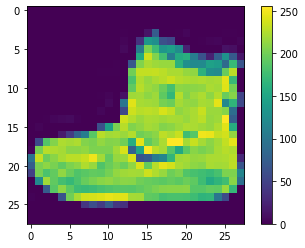

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

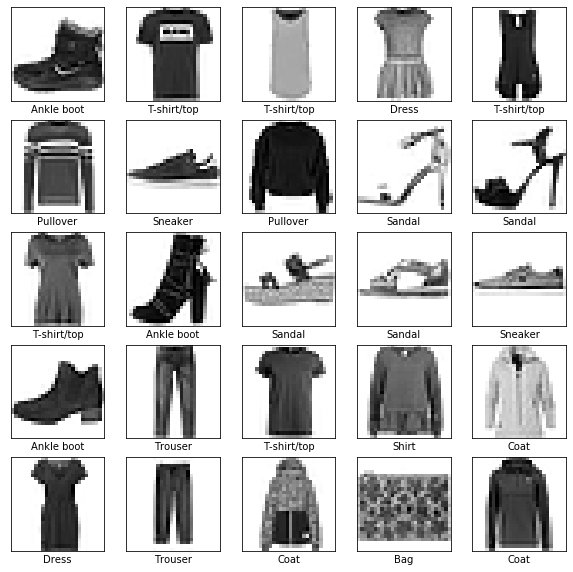

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.4949 - accuracy: 0.8253
Epoch 2/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3737 - accuracy: 0.8652
Epoch 3/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3338 - accuracy: 0.8786
Epoch 4/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.3136 - accuracy: 0.8853
Epoch 5/10
60000/60000 [==============================] - 5s 92us/sample - loss: 0.2932 - accuracy: 0.8906
Epoch 6/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2796 - accuracy: 0.8961
Epoch 7/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2680 - accuracy: 0.9001
Epoch 8/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2556 - accuracy: 0.9046
Epoch 9/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2448 - accuracy: 0.9086
Epoch 10/10
6

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.1943 - accuracy: 0.8838

Test accuracy: 0.8838


In [15]:
predictions = model.predict(test_images)

In [16]:
predictions[0]

array([4.2883867e-06, 5.7161094e-07, 5.5126507e-06, 4.0325297e-08,
       3.0252136e-07, 2.3139883e-03, 6.1729329e-06, 5.4988008e-02,
       1.2434606e-06, 9.4267994e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])

9

In [18]:
test_labels[0]

9

In [19]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

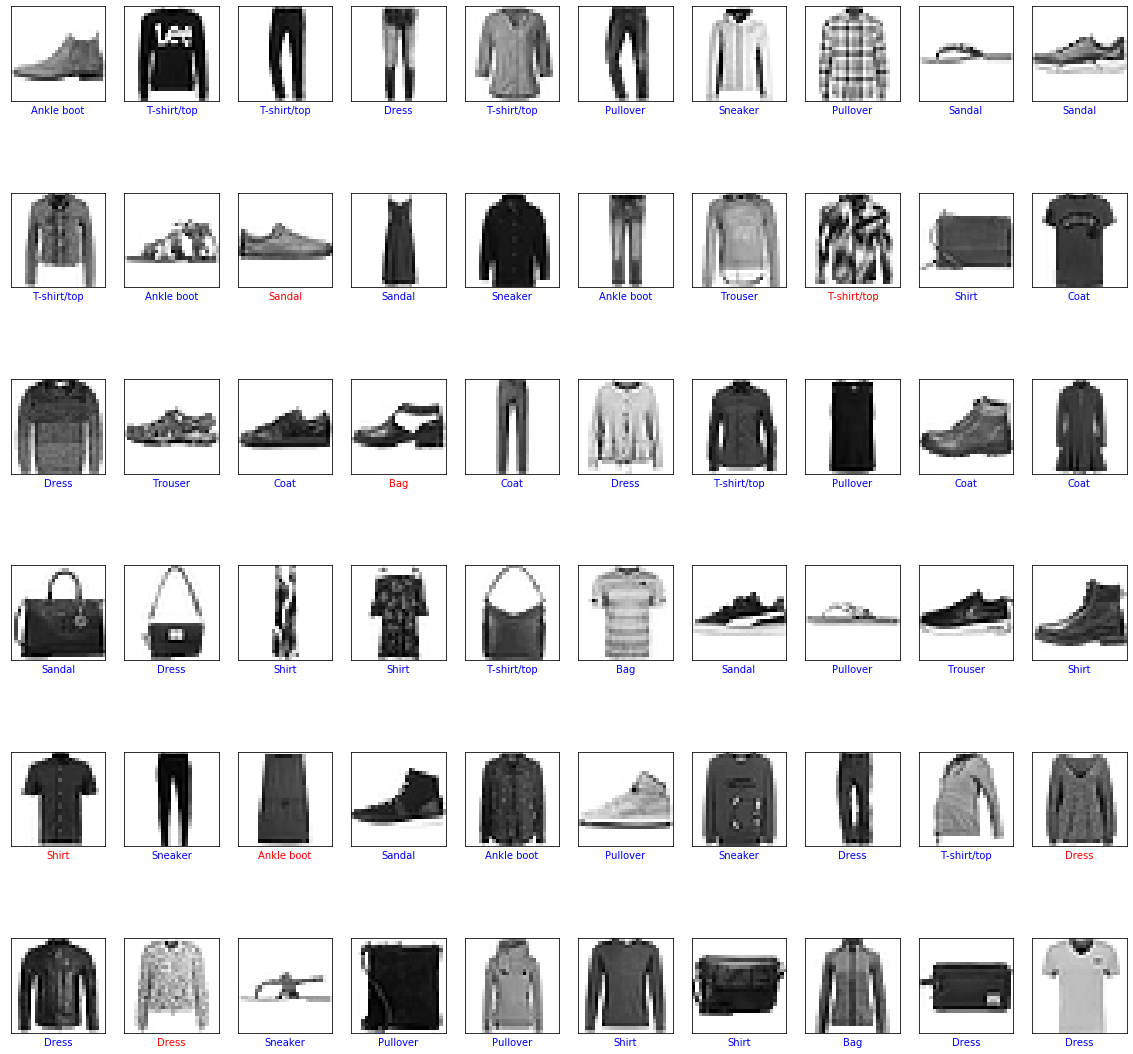

In [30]:
plt.figure(figsize=(20,20))
for i in range(60):
    plt.subplot(6,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.xlabel(class_names[train_labels[i]])
plt.show()